In [3]:
import os
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
img = cv2.imread("C:\\Users\\Devi B\\Desktop\\potato disease\\Ramya\\WhatsApp Image 2024-08-07 at 9.57.51 PM.jpeg")
img.shape

(3264, 2448, 3)

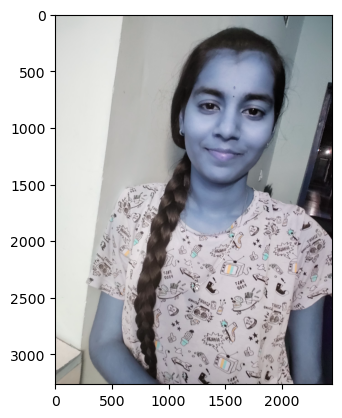

In [5]:
plt.imshow(img)

In [6]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(3264, 2448)

In [7]:
gray

array([[202, 202, 202, ..., 128, 109, 102],
       [202, 202, 202, ..., 121, 104, 100],
       [202, 202, 202, ..., 109, 100, 100],
       ...,
       [145, 142, 142, ...,  32,  33,  36],
       [147, 143, 140, ...,  37,  46,  57],
       [149, 143, 138, ...,  45,  61,  77]], dtype=uint8)

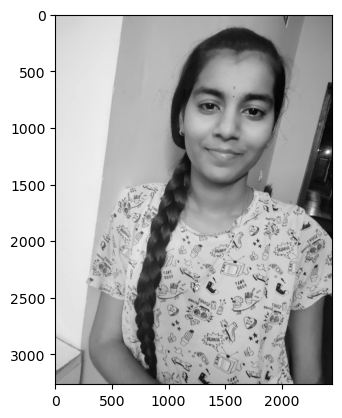

In [8]:
plt.imshow(gray, cmap='gray')

In [9]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 999,  386, 1094, 1094]])

In [10]:
(x,y,w,h) = faces[0]
x,y,w,h

(999, 386, 1094, 1094)

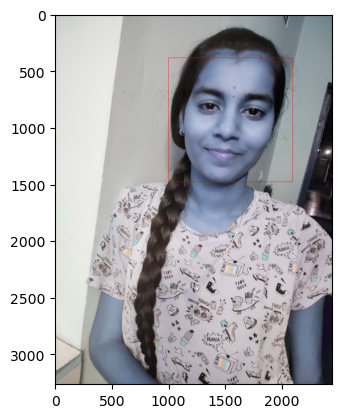

In [11]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

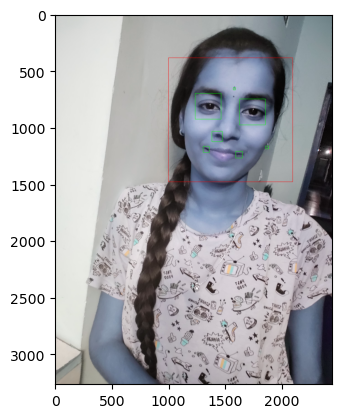

In [12]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

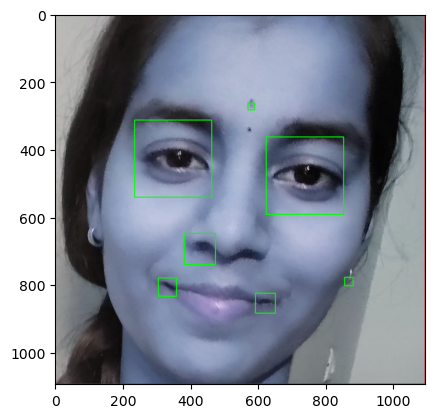

In [13]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

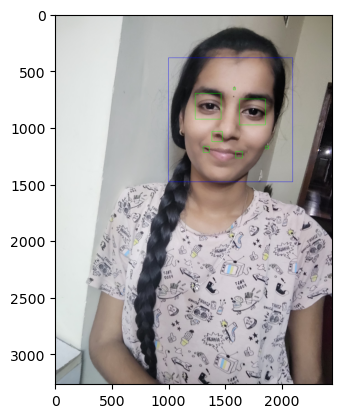

In [16]:
img = cv2.imread("C:\\Users\\Devi B\\Desktop\\potato disease\\Ramya\\WhatsApp Image 2024-08-07 at 9.57.51 PM.jpeg")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x, y, w, h) in faces:
    face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
        eye_crop = roi_color[ey:ey+eh, ex:ex+ew]
        eye_filename = f'eye_{ex}_{ey}.png'
        cv2.imwrite(eye_filename, eye_crop)  
    face_crop = img[y:y+h, x:x+w]
    face_filename = f'face_{x}_{y}.png'
    cv2.imwrite(face_filename, face_crop)

plt.figure()
plt.imshow(cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB))
plt.show()


In [24]:
def process_image(image_path, output_face_folder, output_eye_folder):
    img = cv2.imread(image_path)
    
    if img is None:
        print(f"Image not found: {image_path}")
        return

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]

        face_filename = os.path.join(output_face_folder, f'face_{os.path.basename(image_path)}')
        cv2.imwrite(face_filename, roi_color)
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex, ey, ew, eh) in eyes:
            eye_crop = roi_color[ey:ey+eh, ex:ex+ew]
            eye_filename = os.path.join(output_eye_folder, f'eye_{os.path.basename(image_path)}')
            cv2.imwrite(eye_filename, eye_crop)

In [25]:
input_folder1 = "C:\\Users\\Devi B\\Desktop\\potato disease\\Devi"
input_folder2 = "C:\\Users\\Devi B\\Desktop\\potato disease\\Ramya"
output_face_folder = 'cropped_faces'
output_eye_folder = 'cropped_eyes'

In [26]:
os.makedirs(output_face_folder, exist_ok=True)
os.makedirs(output_eye_folder, exist_ok=True)

In [27]:
for folder in [input_folder1, input_folder2]:
    for filename in os.listdir(folder):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(folder, filename)
            process_image(image_path, output_face_folder, output_eye_folder)

print("Processing complete!")

Processing complete!
